In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import h5py
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.optimizers import SGD, Adadelta, Adagrad
from keras.constraints import max_norm
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D 
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
# Any results you write to the current directory are saved as output.

In [86]:
# labels_file = '../input/train_digitStruct.mat'
# f = h5py.File(labels_file)
# ref = f.get('/digitStruct/name').value[32402][0]  # <HDF5 object reference>
# print(f[ref].value)
# plt.imshow(f[ref].value)
# ref = f.get('/digitStruct/name')
# ref.shape


In [87]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

path = 'train_32x32.mat'
pathTest = 'test_32x32.mat'
X_train, y_train = load_data(path)
X_test, y_test = load_data(pathTest)


In [88]:
# Transposing the the train and test data
# by converting it from  
# (width, height, channels, size) -> (size, width, height, channels)

X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

In [89]:
print("Training Set", X_train.shape)
print('')

print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0]
num_images2 = X_test.shape[0]

print("Total Number of Train Images", num_images)
print("Total Number of Test Images", num_images2)

Training Set (73257, 32, 32, 3)

Test Set (26032, 32, 32, 3)

Total Number of Train Images 73257
Total Number of Test Images 26032


In [90]:
#plt.imshow(X_train[3,:,:,])

def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        #ax.set_title(labels[i])

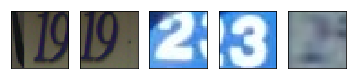

In [91]:
plot_images(X_train, y_train, 1, 5)

In [92]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


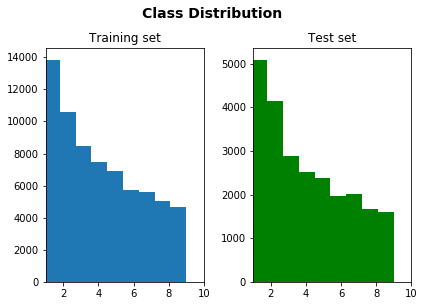

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)

In [95]:
train_mean = np.mean(X_train, axis=0) #Shape (32,3)
train_std = np.std(X_train, axis=0) #Shape (32,3)
X_train_norm = (X_train - train_mean) / train_std
print(X_train.shape)
print(train_mean.shape)
print(train_std.shape)

(63733, 32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [96]:
X_train_norm_array = np.array(X_train_norm)
# y_train_array = np.array(y_train).reshape(len(y_train),1)
y_train_array = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val_array = np.array(X_val)
y_val_array = np.array(y_val)
print(X_train_norm_array.shape)
print(y_train_array.shape)


(63733, 32, 32, 3)
(63733,)


In [97]:
print(y_train_array.shape)
x_train_reshaped = X_train_norm_array[:,:,:,0]
X_val_array_new = X_val_array[:,:,:,0]
print(x_train_reshaped.shape)
# x_train_wtf = x_train_reshaped.reshape(x_train_reshaped.shape[0],-1)
# X_val_res = X_val_array_new.reshape(X_val_array_new.shape[0],-1)
x_train_wtf = x_train_reshaped.astype(np.float32).reshape(-1, 32*32)
X_val_res = X_val_array_new.astype(np.float32).reshape(-1, 32*32)
print(x_train_wtf.shape)
print(X_val_res.shape)

(63733,)
(63733, 32, 32)
(63733, 1024)
(9524, 1024)


In [98]:
print(y_val_array.shape)

(9524,)


In [99]:
# # kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train_wtf, y_train_array)
# # svm_result = kmeans.predict(X_val_res)
# # svm_result = np.array(svm_result).reshape(len(svm_result), -1)
# # print(classification_report(y_val_array.reshape(len(y_val_array), 1), svm_result))




# ################################ SPARSE AUTO ENCODER ####################################
# encoding_dim = 32

# input_img = Input(shape=(1024,))
# # add a Dense layer with a L1 activity regularizer
# encoded = Dense(encoding_dim, activation='relu',
#                 activity_regularizer=regularizers.l1(10e-5))(input_img)
# decoded = Dense(1024, activation='sigmoid')(encoded)

# autoencoder = Model(input_img, decoded)

# encoder = Model(input_img, encoded)

# # create a placeholder for an encoded (32-dimensional) input
# encoded_input = Input(shape=(encoding_dim,))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# autoencoder.fit(x_train_wtf, x_train_wtf,
#                 epochs=100,
#                 batch_size=256,
#                 shuffle=True,
#                 validation_data=(X_val_res, X_val_res))

# encoded_imgs = encoder.predict(X_val_res)
# decoded_imgs = decoder.predict(encoded_imgs)

# n = 10  # how many digits we will display
# plt.figure(figsize=(20, 4))
# for i in range(n):
#     # display original
#     ax = plt.subplot(2, n, i + 1)
#     plt.imshow(X_val_res[i].reshape(32, 32))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)

#     # display reconstruction
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(decoded_imgs[i].reshape(32, 32))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [100]:
# kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train_wtf)
# svm_result = kmeans.predict(X_val_res)
# svm_result = np.array(svm_result).reshape(len(svm_result), -1)
# print(classification_report(y_val_array.reshape(len(y_val_array), 1), svm_result))

# ran_clf =  RandomForestClassifier(n_estimators = 200, max_depth=12)
# ran_clf.fit(x_train_wtf, y_train_array)
# ran_predicted = ran_clf.predict(X_val_res)
# print('Random Forest test accuracy : {}'.format(accuracy_score(y_val_array, ran_predicted)))
# print('=============================================================================')

In [101]:
# svc_clf = Pipeline([
#         ("scaler", StandardScaler()),
#         ("svm_clf", SVC(kernel="poly", degree=7, coef0=1, C=1))
#     ])
# svc_clf.fit(x_train_wtf, y_train_array)
# svc_clf_predicted = svc_clf.predict(X_val_res)
# print('SVM test accuracy : {}'.format(accuracy_score(y_val_array, svc_clf_predicted)))
# print('=============================================================================')

In [102]:
y_train_cnn = to_categorical(y_train_array, 10)
y_val_cnn = to_categorical(y_val_array, 10)
y_test_cnn = to_categorical(y_test, 10)
print(y_train_cnn.shape)
print(y_val_cnn.shape)
print(y_test_cnn.shape)

(63733, 10)
(9524, 10)
(26032, 10)


In [103]:

# I have searched and it seemed like pooling layer is also a fully connected layer so added dropout.

# Shah, with little bit of tuning, This one showed a little bit of accuracy improvement, 92%

def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

'''
def cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(3, 32, 32)))
    model.add(Activation('relu'))
    model.add(Convolution2D(32, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(64, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Convolution2D(128, 3, 3, border_mode='same'))
    model.add(Activation('relu'))
    model.add(Convolution2D(128, 3, 3))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model
'''


# This was the original CNN
'''def cnn_model(): 
    model = Sequential()
    model.add(Conv2D(32, (3, 3), strides=1, activation='relu',
                            input_shape=(32, 32, 3), kernel_constraint=max_norm(3)))
#     model.add(Dropout(0.90))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
#     model.add(Dropout(0.75))
#     model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu', strides=1, kernel_constraint=max_norm(3)))
#     model.add(Dropout(0.75))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
#     model.add(Dropout(0.50))
#     model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu', strides=1, kernel_constraint=max_norm(3)))
#     model.add(Dropout(0.50))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
#     model.add(Dropout(0.50))
    model.add(Flatten())
    model.add(Dense(10))
#     model.add(Activation('relu'))
#     #model.add(Dropout(0.50))
#     model.add(Dense(10))
    model.add(Activation('softmax'))
#     model.add(Dense(10))
#     model.add(Activation('softmax'))
    
    return model;
'''

    

"def cnn_model(): \n    model = Sequential()\n    model.add(Conv2D(32, (3, 3), strides=1, activation='relu',\n                            input_shape=(32, 32, 3), kernel_constraint=max_norm(3)))\n#     model.add(Dropout(0.90))\n    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))\n#     model.add(Dropout(0.75))\n#     model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))\n    model.add(Conv2D(64, (3, 3), activation='relu', strides=1, kernel_constraint=max_norm(3)))\n#     model.add(Dropout(0.75))\n    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))\n#     model.add(Dropout(0.50))\n#     model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))\n    model.add(Conv2D(128, (3, 3), activation='relu', strides=1, kernel_constraint=max_norm(3)))\n#     model.add(Dropout(0.50))\n    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))\n#     model.add(Dropout(0.50))\n    model.add(Flatten())\n    model.add(Dense(10))\n#     model.add(Activation('relu'))\n#     #model.add(D

In [104]:
X_test.shape, X_train_norm_array.shape

((26032, 32, 32, 3), (63733, 32, 32, 3))

In [105]:
batch_size = 128
nb_classes = 10
nb_epoch = 20
model = cnn_model()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train_norm_array, y_train_cnn, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_data=(X_val_array, y_val_cnn))
score = model.evaluate(X_test, y_test_cnn, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])

/home/dongjoon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 63733 samples, validate on 9524 samples
Epoch 1/20


UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_11/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@training_1/SGD/gradients/conv2d_11/convolution_grad/Conv2DBackpropFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](training_1/SGD/gradients/conv2d_11/convolution_grad/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer, conv2d_11/kernel/read)]]
	 [[{{node loss_1/mul/_233}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_918_loss_1/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]